Malaria detection from Blood cell images

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn opencv-python

   ---------------------------------------- 39.5/39.5 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Load the Malaria Dataset

In [3]:
reqd_folder_path = os.path.join(os.getcwd(), "datasets")
print(reqd_folder_path)

data_dir = os.path.join(reqd_folder_path, "malaria_dataset")
infected_path = os.path.join(data_dir, "Parasitized")
uninfected_path = os.path.join(data_dir, "Uninfected")


infected_files = os.listdir(infected_path)[:200]
uninfected_files = os.listdir(uninfected_path)[:200]

print(infected_files)
print(uninfected_files)




d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets
['C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_114756a_cell_180.png', 'C33P1thinF_IMG_20150619_114756a_cell_181.png', 'C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_115740a_cell_161.png', 'C33P1thinF_IMG_20150619_115740a_cell_162.png', 'C33P1thinF_IMG_20150619_115740a_cell_163.png', 'C33P1thinF_IMG_20150619_115808a_cell_205.png', 'C33P1thinF_IMG_20150619_115808a_cell_206.png', 'C33P1thinF_IMG_20150619_120645a_cell_215.png', 'C33P1thinF_IMG_20150619_120645a_cell_216.png', 'C33P1thinF_IMG_20150619_120645a_cell_217.png', 'C33P1thinF_IMG_20150619_120742a_cell_210.png', 'C33P1thinF_IMG_20150619_120804a_cell_224.png', 'C33P1thinF_IMG_20150619_120838a_cell_222.png', 'C33P1thinF_IMG_20150619_121102a_cell_193.png', 'C33P1thinF_IMG_20150619_121229a_cell_177.png', 'C33P1thinF_IMG_20150619_121229a_cell_178.png', 'C33P1thinF_IMG_20150619_121229a_cell_179.

 Preprocess the Images

In [4]:
def load_images(folder, label):
    data = []
    for file in folder:
        img_path = os.path.join(infected_path if label == 1 else uninfected_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (50,50))
        data.append([img.flatten(), label])
    
    return data


In [5]:
infected_data = load_images(infected_files, 1)
uninfected_data = load_images(uninfected_files, 0)


In [6]:
dataset = infected_data + uninfected_data
df = pd.DataFrame(dataset, columns=['image','label'])

In [7]:
df

,image,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
...,...,...
395,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
396,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
397,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
398,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


Prepare Data for Training

In [8]:
X = np.array(df['image'].tolist())
y = np.array(df['label'].tolist())



In [9]:
X = X / 255.0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Train the KNN Model

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Evaluate the Model

In [13]:
y_pred = knn.predict(X_test)

In [14]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 66.25%


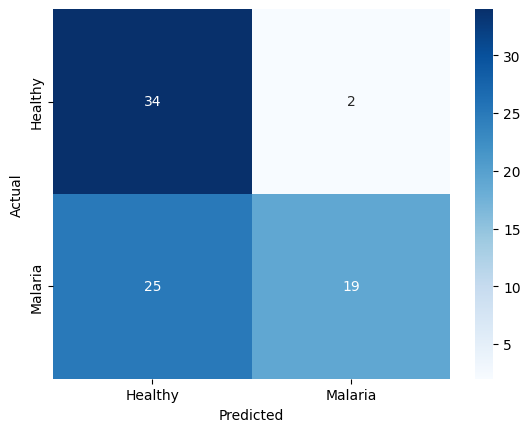

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy','Malaria'], yticklabels=['Healthy','Malaria'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
print('Classification report:')
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.58      0.94      0.72        36
           1       0.90      0.43      0.58        44

    accuracy                           0.66        80
   macro avg       0.74      0.69      0.65        80
weighted avg       0.76      0.66      0.64        80



Test on New Images

In [18]:
def predict_image(image_path, display_image = False):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (50,50)).flatten() / 255.0
    img = scaler.transform([img])
    prediction = knn.predict(img)

    result_text = "Malaria Detected" if prediction[0] == 1 else "Healthy Cell"

    if display_image == True:
        plt.figure(figsize=(4,4))
        img_display = cv2.imread(image_path)
        img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
        plt.imshow(img_display)
        plt.axis('off')
        plt.title(f'Prediction: {result_text}', fontsize=12, color='red' if prediction[0] == 1 else 'green' )
        plt.show()


    else:        
        pass

    return result_text


Test with a new image

In [19]:
reqd_file_path = os.path.join(os.getcwd(), 'datasets','malaria_dataset')
print(reqd_file_path)

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset


In [21]:
sample_image_folder = os.path.join(reqd_file_path, 'random_samples')
sample_imgs = os.listdir(sample_image_folder)[:10]
print(sample_imgs)

['C1_thinF_IMG_20150604_104722_cell_115.png', 'C1_thinF_IMG_20150604_104722_cell_123.png', 'C1_thinF_IMG_20150604_104722_cell_143.png', 'C1_thinF_IMG_20150604_104722_cell_15.png', 'C1_thinF_IMG_20150604_104722_cell_164.png', 'C1_thinF_IMG_20150604_104722_cell_191.png', 'C1_thinF_IMG_20150604_104722_cell_60.png', 'C1_thinF_IMG_20150604_104722_cell_66.png', 'C1_thinF_IMG_20150604_104722_cell_73.png', 'C1_thinF_IMG_20150604_104722_cell_79.png']


In [22]:
sample1 = os.path.join(sample_image_folder, sample_imgs[0])
print(sample1)

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_115.png


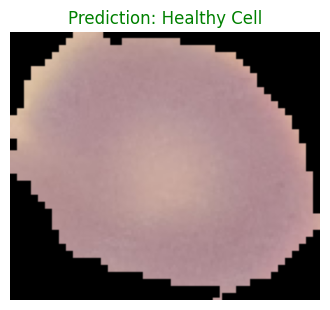

Prediction: Healthy Cell


In [23]:
test_image = sample1
result = predict_image(test_image, True)
print(f'Prediction: {result}')

Now lets test few more of the sample images

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples
d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_115.png


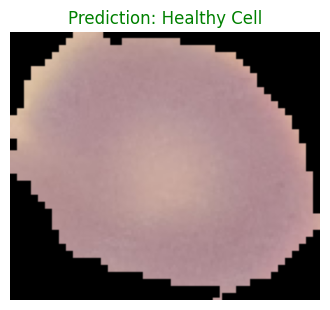

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_123.png


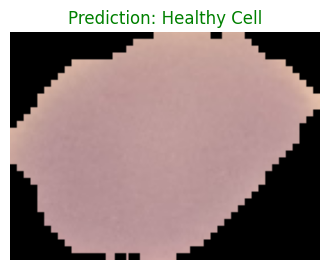

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_143.png


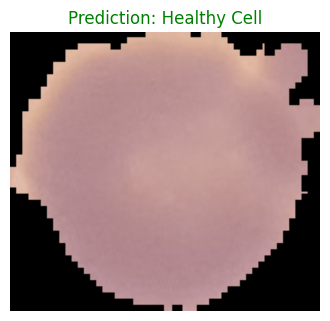

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_15.png


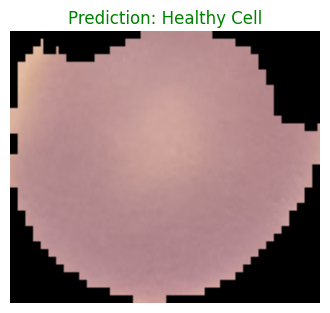

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_164.png


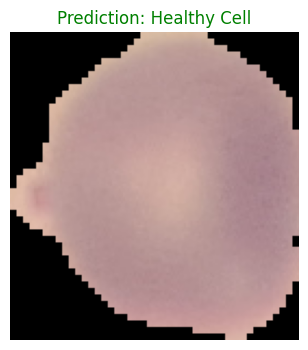

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_191.png


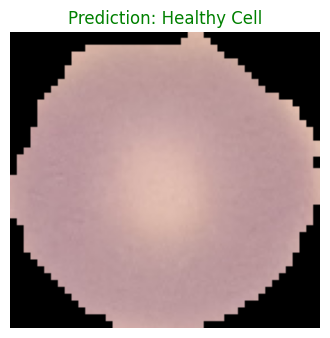

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_60.png


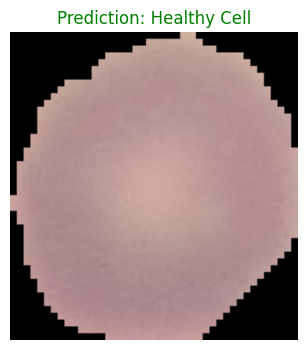

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_66.png


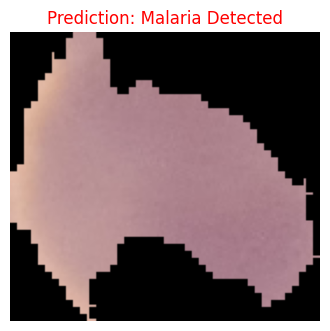

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_73.png


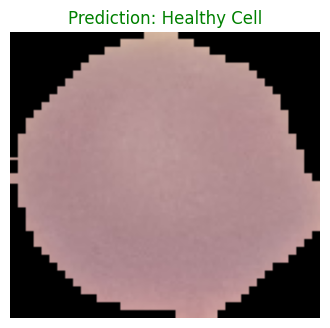

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_79.png


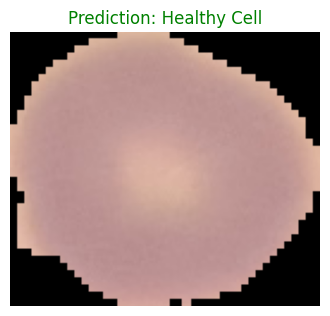

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_81.png


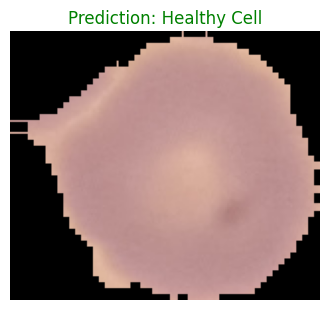

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C1_thinF_IMG_20150604_104722_cell_9.png


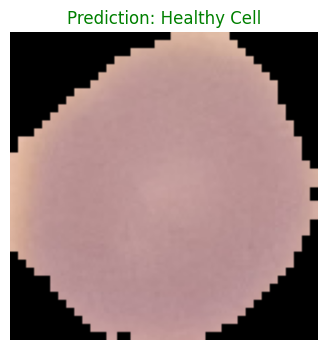

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_114756a_cell_179.png


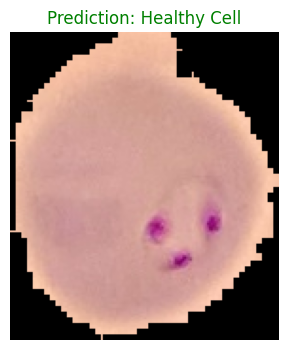

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_114756a_cell_180.png


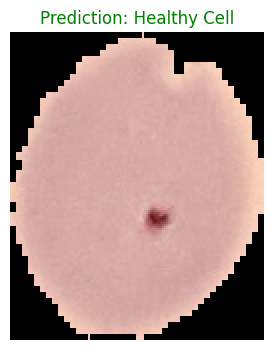

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_114756a_cell_181.png


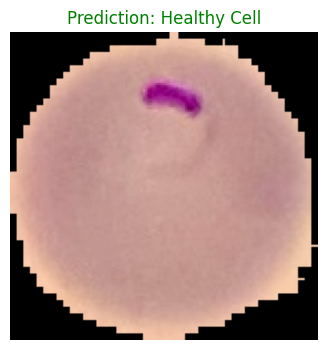

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_114756a_cell_182.png


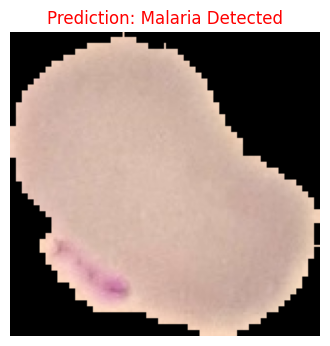

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_115740a_cell_161.png


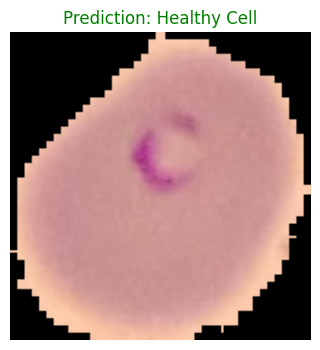

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_115740a_cell_162.png


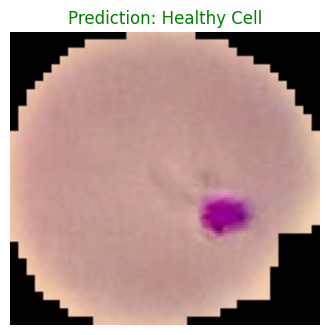

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_115740a_cell_163.png


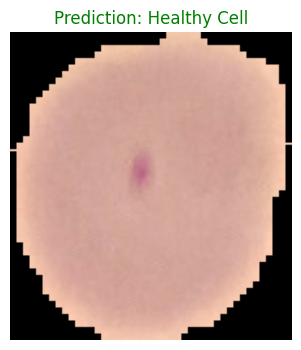

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_115808a_cell_205.png


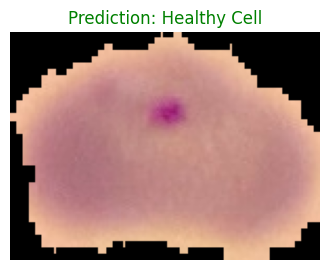

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_115808a_cell_206.png


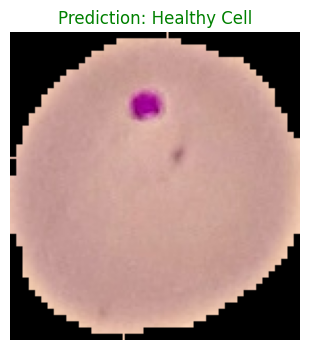

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_120645a_cell_215.png


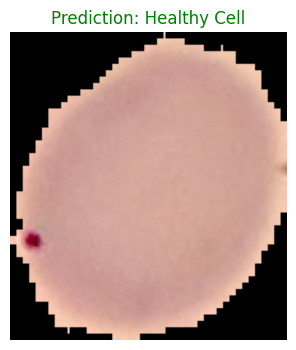

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_120645a_cell_216.png


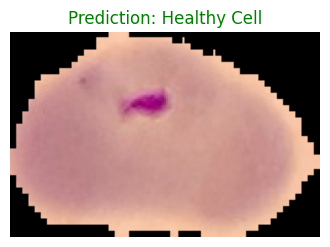

d:\sandbox\python\experiments\machine-learning-experiments\Project-Machine-Learning\datasets\malaria_dataset\random_samples\C33P1thinF_IMG_20150619_120645a_cell_217.png


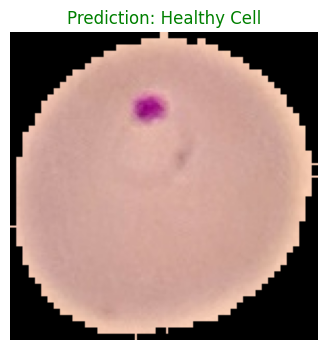

In [25]:
other_samples = os.listdir(sample_image_folder)[:24]
print(sample_image_folder)

for sample in other_samples:
    sample_file_path = os.path.join(sample_image_folder, sample)
    print(sample_file_path)
    predict_image(sample_file_path, display_image=True)

We have successfully completed our project

We have trained an Artificial Intelligence model (an AI model) to use the K-Nearest-Neighbors method under supervised learning. To find out from an image of a blood cell. Whether the blood cell is infected by malaria or not.